# Topic Modelling for Twitter US Airline Sentiment with Gensim

## **Executive Summary**

To be updated

## 1. Introduction

### 1.1 Purpose

In this notebook, we aim to illustrate how to perform topic modelling to extract common topics related travelers' feelings on Twitter about six US Airlines. Through this step-by-step example, it is my hope to provide some guidance about how to apply topic modelling in analysing large, unstructured volumes of text which could hold valuable insights for people and organisations in understanding what is going with current affairs and businesses. 

### 1.2 Topic Modelling

Before jumping to the technical details, let's explore what topic modelling is according to literature. 

***Topic modelling is an unsupervised model that learns the set of underlying topics (in terms of word distributions) for a set of documents and each document’s affinities to these topics.***

In my own layman's terms, when we aren’t sure what we are looking for, topic modelling can help to condense long chunks of text into concise words to understand the main ideas. It's a quick and easy way to answer the question, "What are people talking about?"

### 1.3 Latent Dirichlet Allocation

There are various models to perform topic modelling. However, we will focus on the most popular model named Latent Dirichlet Allocation (LDA), which has been applied in machine learning since 2003. For further details about LDA, this research paper offers great information https://ai.stanford.edu/~ang/papers/jair03-lda.pdf. For layman's explanation, do checkout Edwin Chen's awesome post at http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

### 1.4 Dataset

We will be using the Twitter US Airline Sentiment dataset from Kaggle. You may download the dataset from this URL https://www.kaggle.com/crowdflower/twitter-airline-sentiment

The data contains data about how travelers expressed their feelings on Twitter about 6 US airlines in February 2015. In the next section, we will explore some basic details about the dataset. 

## 2. Data Exploration

### 2.1 Dataset Import

Before analysing the data, we will import the dataset in CSV format obtained from Kaggle. For ease of access, the dataset have been downloaded, unzipped and stored locally at the following path 'C:/Users/Lenovo/Downloads/Tweets.csv'. However if you have save the data at a different location, please remember to update the path. 

In [1]:
import csv
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/Lenovo/Downloads/Tweets.csv') #Remember to change the path if you store the csv file at a different location
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 2.2 Preliminary Data Exploration and Data Cleansing

#### 2.2.1 Explore the rows and columns

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


By using the DataFrame.info() method, we learn that the dataset has 14,640 records split across 15 different columns. Out of these 15 columns, 3 columns including airline_sentiment_gold, negativereason_gold, tweet_coord have a lot of null values and will not be very useful for subsequent analysis. Therefore, we will proceed to delete these 3 columns.

#### 2.2.2 Delete redundant columns

In [3]:
del data['airline_sentiment_gold']
del data['negativereason_gold']
del data['tweet_coord']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Upon studying specific data in each column, the column 'text' containing the tweet's content will be the main focus for topic modelling. However, to ensure the topic model is informative and meaningful, we will remove the below 2 components from the column 'text'.
- Stopwords: words that are very frequently used and add absolutely no meaning to the text (e.g. about, also, ever, etc.) 
- Mentions to the airline (i.e. words which start with @)

The steps to remove these 2 components will be further elaborated in section 3 as we proceed with topic modelling. 

## 3. Topic Modelling

### 3.1 Library Import

Before importing necessary libraries to the Jupyter notebook, we need to install the relevant packages first. Therefore if the below codes result in "not found" error message, please make sure to have the packages installed first via pip or conda.

In [8]:
# To import regular expressions for removing mentions to the airline
import re

# To import nltk to remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# To import gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# To import spacy for lemmatization
import spacy

# To import matplotlib and pyLDAvis to visualise the topic modelling results
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### 3.2 Prepare Text Dataset

Since Gensim package only works on list, we will first have to transform the column 'text' to a list, then remove airline mentions. Please ignore the stopwords for now as we will come back to them later. 

In [12]:
tweet_content = data.text.values.tolist()
print(tweet_content[10:20])

['@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24', '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D', "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p", "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn", '@VirginAmerica Thanks!', '@VirginAmerica SFO-PDX schedule is still MIA.', "@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo", "@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!", 'I ❤️ flying @VirginAmerica. ☺️👍', '@VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.']


In [13]:
# To remove airline mentions starting with @ and distracting single quotes
tweet_content = [re.sub('@\S*\S?','',tweet) for tweet in tweet_content]
tweet_content = [re.sub("\'",'',tweet) for tweet in tweet_content]
print(tweet_content[10:20])

[' did you know that suicide is the second leading cause of death among teens 10-24', ' I &lt;3 pretty graphics. so much better than minimal iconography. :D', ' This is such a great deal! Already thinking about my 2nd trip to  &amp; I havent even gone on my 1st trip yet! ;p', '  Im flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn', ' Thanks!', ' SFO-PDX schedule is still MIA.', ' So excited for my first cross country flight LAX to MCO Ive heard nothing but great things about Virgin America. #29DaysToGo', '  I flew from NYC to SFO last week and couldnt fully sit in my seat due to two large gentleman on either side of me. HELP!', 'I ❤️ flying  ☺️👍', ' you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.']


### 3.2 Tokenize Words

From the previous step, we obtain a slightly cleaner text. Please keep in mind that we want to break down those chunks of words in order to identify the key ideas. Therefore, the next step will be to split those long sentences and phrases into individual words. That process is called 'word tokenization'.

To proceed, we will use Gensim's simple_preprocess() to tokenize each tweet into a list of words, removing punctuations and distracting characters.

In [24]:
def content_to_words(tweet_content):
    for tweet in tweet_content:
        yield(gensim.utils.simple_preprocess(str(tweet), deacc = True))

tweet_words = list(content_to_words(tweet_content))

print(tweet_words[10:20])

[['did', 'you', 'know', 'that', 'suicide', 'is', 'the', 'second', 'leading', 'cause', 'of', 'death', 'among', 'teens'], ['lt', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography'], ['this', 'is', 'such', 'great', 'deal', 'already', 'thinking', 'about', 'my', 'nd', 'trip', 'to', 'amp', 'havent', 'even', 'gone', 'on', 'my', 'st', 'trip', 'yet'], ['im', 'flying', 'your', 'fabulous', 'seductive', 'skies', 'again', 'take', 'all', 'the', 'stress', 'away', 'from', 'travel', 'http', 'co', 'ahlxhhkiyn'], ['thanks'], ['sfo', 'pdx', 'schedule', 'is', 'still', 'mia'], ['so', 'excited', 'for', 'my', 'first', 'cross', 'country', 'flight', 'lax', 'to', 'mco', 'ive', 'heard', 'nothing', 'but', 'great', 'things', 'about', 'virgin', 'america', 'daystogo'], ['flew', 'from', 'nyc', 'to', 'sfo', 'last', 'week', 'and', 'couldnt', 'fully', 'sit', 'in', 'my', 'seat', 'due', 'to', 'two', 'large', 'gentleman', 'on', 'either', 'side', 'of', 'me', 'help'], ['flying'], ['you', 'know', 'w

### 3.3 Create model to identify bigrams and trigrams

After tokenizing words, all tweet's text have been broken down into single words. However, we have a problem. There are several phrases which occurs frequently together and carry specific meaning in our context. Those are called bigrams or trigrams. Remember the old saying, "Half the bread is still bread, but half the truth is not the truth." Separating these words and analysing them in isolation will likely result in misleading result. 

To address this problem, we would want to set up a method to link them together and Gensim's phrases model is a great tool to do the job.

In [25]:
bigram = gensim.models.Phrases(tweet_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[tweet_words], threshold = 100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

for word in trigram_mod[bigram_mod[tweet_words[10:20]]]:
    print(word)

['did', 'you', 'know', 'that', 'suicide', 'is', 'the', 'second_leading_cause', 'of', 'death_among_teens']
['lt', 'pretty', 'graphics', 'so', 'much', 'better', 'than', 'minimal', 'iconography']
['this', 'is', 'such', 'great', 'deal', 'already', 'thinking', 'about', 'my', 'nd', 'trip', 'to', 'amp', 'havent', 'even', 'gone', 'on', 'my', 'st', 'trip', 'yet']
['im', 'flying', 'your', 'fabulous', 'seductive', 'skies', 'again', 'take', 'all', 'the', 'stress', 'away', 'from', 'travel', 'http', 'co', 'ahlxhhkiyn']
['thanks']
['sfo', 'pdx', 'schedule', 'is', 'still', 'mia']
['so', 'excited', 'for', 'my', 'first', 'cross_country', 'flight', 'lax', 'to', 'mco', 'ive', 'heard', 'nothing', 'but', 'great', 'things', 'about', 'virgin_america', 'daystogo']
['flew', 'from', 'nyc', 'to', 'sfo', 'last', 'week', 'and', 'couldnt', 'fully', 'sit', 'in', 'my', 'seat', 'due', 'to', 'two', 'large', 'gentleman', 'on', 'either', 'side', 'of', 'me', 'help']
['flying']
['you', 'know', 'what', 'would', 'be', 'amazin

### 3.4 Cleansing tokenized words

As we observe the above set of tokenized words, we should not be happy yet. Our text isn't ready for the LDA model because of the 3 remaining issues.
- The text still contains stopwords.
- We have a model to identify bigrams and trigrams, but haven't applied the model to the text to create the actual bigrams and trigrams.
- Despite same meanings, words coming from the same family (e.g. delayed, delaying, delay) are still counted separatedly.

As such, we will spare the next few steps to define and execute Python functions to eliminate stopwords, creating bigrams and lemmatizing words to address these 3 issues respectively. 

In [26]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [27]:
# To remove stopwords
tweet_words_nostopword = remove_stopwords(tweet_words)

# To form bigrams
tweet_words_bigrams = make_bigrams(tweet_words_nostopword)

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

# To lematize while keeping only nouns, adjectives, verbs and adverbs
tweet_lemmatized = lemmatization(tweet_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(tweet_lemmatized[10:20])

[['know', 'suicide', 'second_leading', 'cause', 'teen'], ['pretty', 'graphic', 'much', 'well', 'minimal', 'iconography'], ['great', 'deal', 'already', 'think', 'trip', 'even', 'go', 'trip', 'yet'], ['be', 'fly', 'fabulous', 'seductive', 'sky', 'take', 'stress', 'travel', 'http', 'co', 'ahlxhhkiyn'], [], ['schedule', 'still', 'mia'], ['excited', 'first', 'flight', 'lax', 'mco', 'have', 'hear', 'great', 'thing', 'daystogo'], ['fly', 'last', 'week', 'could', 'fully', 'sit', 'seat', 'due', 'large', 'gentleman', 'side', 'help'], ['fly'], ['know', 'would', 'amazingly', 'awesome', 'bos', 'want', 'fly']]


### 3.5 Create inputs for the LDA topic model

Before we proceed further, let's go through some core concepts related to the LDA topic model.
- corpus: a collection of documents to be used as input to train the topic model and extract topic (In our case, it is the entire tweet's text after lemmatization)
- document: any string object (e.g. a paragraph of text, news article, book, novel, ect. In our case, one document represents a chunk of text in the 'text' column)
- token: any single word which will be converted to unique integer ID 
- dictionary: the mapping between token and its unique integer ID

In this section, we will define the the dictionary and the corpus, which are the two main inputs required for the LDA. 

In [29]:
id2word = corpora.Dictionary(tweet_lemmatized)

texts = tweet_lemmatized

corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[10:20])

[[(49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(11, 2), (34, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)], [(9, 1), (26, 1), (45, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [], [(74, 1), (75, 1), (76, 1)], [(4, 1), (24, 1), (25, 1), (63, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1)], [(26, 1), (29, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(26, 1)], [(26, 1), (32, 1), (50, 1), (93, 1), (94, 1), (95, 1), (96, 1)]]


### 3.6 Build topic model and find the optimal number of topics for LDA

Now all the prep is done, we are so close to build our very first topic model using Gensim LDA model. For detailed explanation about what each parameter of the code means, please refer to https://radimrehurek.com/gensim/models/ldamodel.html

Out of all parameters, the single most important parameter to be careful with is num_topics, which refers to the number of topics that you want the model to extract from your data. There is currently no standard practices for the optimal number of topics to be used, but as a general rule of thumb, we should go with the number of topics which generates the highest coherence value.

In order to find the optimal number of topics, we will create a function to calculate coherence value when using different number of topics between 2 and 40 and select the one with the highest coherence value. It is important to note that having too many topics will hinder our understand as we are interested in the big picture and main ideas. Therefore, for such a small dataset with approximately 14,000 records, we won't go beyond 40 topics to avoid going into too granular sub-topics. 

In [41]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=2000, passes=20, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweet_lemmatized, start=2, limit=40, step=6)



In [42]:
# To print the coherence scores to determine the highest coherence value 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2559
Num Topics = 8  has Coherence Value of 0.4117
Num Topics = 14  has Coherence Value of 0.4147
Num Topics = 20  has Coherence Value of 0.4411
Num Topics = 26  has Coherence Value of 0.492
Num Topics = 32  has Coherence Value of 0.4801
Num Topics = 38  has Coherence Value of 0.5244


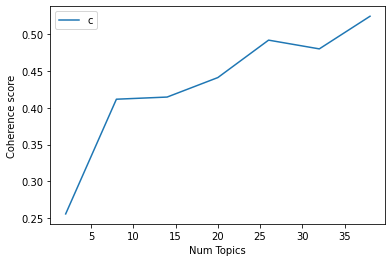

In [43]:
# To plot a graph showing the coherence scores against number of topics
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Based on the coherence scores obtained from different number of topics, we will choose 40 as the final number of topics for the LDA model in subsequent visualisation.

In [50]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=40, random_state=100, update_every=1, chunksize=2000, passes=20, alpha='auto', per_word_topics=True)


### 3.7 Visualise Topic Modelling with pyLDAvis

Leveraging the above LDA model, we will create chart using pyLDAvis to visualise the topics-keywords. 

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Lenovo\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
36     0.353049 -0.058181       1        1  9.017551
29     0.101807  0.020093       2        1  4.637184
9      0.021797  0.007150       3        1  4.143354
18     0.298848 -0.057896       4        1  3.886942
8      0.077074  0.066809       5        1  3.885408
24     0.097689 -0.011296       6        1  3.692110
35     0.116203 -0.063575       7        1  3.673429
31     0.012550  0.011156       8        1  3.525676
28    -0.007611  0.258433       9        1  3.338737
1      0.020381  0.228030      10        1  3.329578
10     0.102514 -0.044528      11        1  3.255636
27     0.008534  0.173117      12        1  3.121256
23    -0.026976  0.142687      13        1  2.483132
25     0.000818  0.006523      14        1  2.470326
4      0.005104  0.079883      15        1  2.465952
11    -0.008905 -0.024718      16        1  2.444247
7      0.034628 -0.000376      17        1  2.333127
13    -0.001295 -0.027770      18        1  2.295430
30    -0.048365  0.069137      19        1  2.278734
21    -0.044207 -0.001815      20        1  2.143483
38    -0.049469  0.006677      21        1  2.067115
39    -0.038858  0.178835      22        1  1.971231
20    -0.065231 -0.044891      23        1  1.912932
26    -0.050761  0.126658      24        1  1.855787
15    -0.062945 -0.044115      25        1  1.768103
32     0.030841 -0.071435      26        1  1.765661
14    -0.018012 -0.065369      27        1  1.724256
34    -0.009711 -0.088350      28        1  1.718189
2     -0.069423 -0.046204      29        1  1.661617
5     -0.074543 -0.049791      30        1  1.626457
12    -0.056844 -0.074570      31        1  1.564433
22    -0.041600 -0.092821      32        1  1.550020
17    -0.064698 -0.069097      33        1  1.505303
0     -0.079622 -0.072073      34        1  1.461357
16    -0.050555 -0.037230      35        1  1.390118
3     -0.068786 -0.083394      36        1  1.338497
33    -0.054138 -0.063813      37        1  1.302149
37    -0.094167 -0.059884      38        1  1.229283
6     -0.091122 -0.058244      39        1  1.187147
19    -0.103990 -0.063754      40        1  0.979052, topic_info=     Category         Freq     Term        Total  loglift  logprob
25    Default  4390.000000   flight  4390.000000  30.0000  30.0000
87    Default  1115.000000     help  1115.000000  29.0000  29.0000
118   Default  1039.000000     call  1039.000000  28.0000  28.0000
36    Default   936.000000     time   936.000000  27.0000  27.0000
45    Default  1044.000000       be  1044.000000  26.0000  26.0000
...       ...          ...      ...          ...      ...      ...
1453  Topic40     6.384496     wake     7.370068   4.4828  -5.0379
879   Topic40     5.902790  gesture     6.888361   4.4719  -5.1164
1505  Topic40     5.745201    apple     6.730772   4.4680  -5.1434
891   Topic40     5.451167    stray     6.436738   4.4601  -5.1960
2138  Topic40     3.991454      pvd     4.977026   4.4057  -5.5076

[1351 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
543       8  0.827389     ability
122      17  0.994137        able
640      29  0.937844         abq
401       5  0.971622    absolute
757      38  0.979101  absolutely
...     ...       ...         ...
1982      2  0.942116         wtf
166      19  0.993274        year
420       1  0.994962   yesterday
65       18  0.987785         yet
1290     20  0.871057        zone

[1362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[37, 30, 10, 19, 9, 25, 36, 32, 29, 2, 11, 28, 24, 26, 5, 12, 8, 14, 31, 22, 39, 40, 21, 27, 16, 33, 15, 35, 3, 6, 13, 23, 18, 1, 17, 4, 34, 38, 7, 20])

The pyLDAvis charts help us to answer 3 basic questions about our topic model. 

***1. How prevalent is each topic?***

Looking at the chart on the left (i.e. Intertopic Distance Map), each bubble represents one single topic and the size of the bubble represents the prevalence. Each bubble is also numbered from 1 to 40 according to decreasing order of prevalence. For example, topic 1 is the most commonly expressed across all tweets about 6 airlines.

***2. How do the topics relate to each other?***

Let's look at the chart on the left one more time. The closer the bubbles, the more closely related the topics are. For example, topic 1 and 4 are closely related to each other owing to overlapping words. 

***3. What does each topic mean?***

This time, we focus on the chart on the right. If we select a topic on the left, the chart on the right will show us the most useful words to understand what that topic is all about. For example, topic 1 could be interpreted as "flight cancellation" whereas topic 2 could be related to "change in reservation booking".

## 4. Additional Visualisation and Result Interpretation

As shown above, pyLDAvis offers quick and intuitive insights about our topic model. However, let's try to explore further insights about our dataset other visualisation packages such as plotly express and wordcloud. 

Since we want to focus on discovering insights instead of purely showcasing other visualisations, this section will be structured based on questions that the visualisation can help to answer. 

### 4.1 How widely is each topic discussed on Twitter?

To answer this question, we can look at 2 metrics for each topic. 
- Number of related tweets per topic
- Percentage of related tweets over total number of tweets 

The higher the metrics value is, the more widely the topic is discussed. Don't forget that one tweet can be related to multiple topics since travelers can talk about different things within a tweet. Therefore the same tweet can be counted against multiple topics. 